In [2]:
import subprocess
 
arg  = ["ls"] + ["-l"]
print(arg)
subprocess.call(["ls", "-l"])
subprocess.call(["tree"])

subprocess.call(arg)
subprocess.call('ls', shell=True, cwd='/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/')

['ls', '-l']
total 108
-rwxrwxr-x 1 jctuesta jctuesta 55480 апр 24 18:51 a.out
-rwxrwxr-x 1 jctuesta jctuesta 27816 апр 24 20:16 generator
-rw-rw-r-- 1 jctuesta jctuesta  1088 апр 24 20:16 generator.cpp
-rw-rw-r-- 1 jctuesta jctuesta 16808 апр 19 03:21 test.ipynb
.
├── a.out
├── generator
├── generator.cpp
└── test.ipynb

0 directories, 4 files
total 108
-rwxrwxr-x 1 jctuesta jctuesta 55480 апр 24 18:51 a.out
-rwxrwxr-x 1 jctuesta jctuesta 27816 апр 24 20:16 generator
-rw-rw-r-- 1 jctuesta jctuesta  1088 апр 24 20:16 generator.cpp
-rw-rw-r-- 1 jctuesta jctuesta 16808 апр 19 03:21 test.ipynb
brute_force.cpp
brute_force.h
dp.cpp
dp.h
input
LC.cpp
LC.h
main.cpp
out


0

In [3]:
subprocess.call(["cat", "/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/dp.cpp"])

//Dinamic Programic method
#include "dp.h"
int dinamic_programing(int W, std::vector<int>& wt, std::vector<int>& profit, int n) {
    std::vector<int> dp (W + 1, 0);

    for (int i = 1; i < n + 1; ++i) {
        for (int w = W; w >= 0; --w) {

            if (wt[i - 1] <= w)
                // finding the maximum profit
                dp[w] = std::max(dp[w],
                                 dp[w - wt[i - 1]] + profit[i - 1]);
        }
    }
    return dp[W]; // returning the maximum profit of knapsack
}


0

In [4]:
subprocess.call(["cat", "/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/LC.cpp"])

//llbb method
#include "LC.h"

void cast_data(Node& a, float upper_b, float lower_b, int level, bool flag, float tree_v, float tree_w) {
    a.upper_b = upper_b;
    a.lower_b = lower_b;
    a.level = level;
    a.flag = flag;
    a.tree_v = tree_v;
    a.tree_w = tree_w;
}

LC::LC(int weight_max, std::vector<int> &weight, std::vector<int> &profit) {
    _capacity = weight_max;
    _size = profit.size();
    for (int i = 0; i < _size; ++i) {
        _arr.push_back(Item{.weight = static_cast<float>(weight[i]),
                .profit = profit[i] ,
                .idx = i});
    }
}

float LC::upper_bound(float tree_v, float tree_w, int idx) {
    float value = tree_v;
    float weight = tree_w;
    for (int i = idx; i < _size; i++) {
        if (weight + _arr[i].weight <= _capacity) {
            weight += _arr[i].weight;
            value -= _arr[i].profit;
        } else {
            value -= (float)(_capacity - weight) / _arr[i].weight * _arr[i].profit;
            break;
        }

0


    }
    return value;
}

float LC::lower_bound(float tree_v, float tree_w, int idx) {
    float value = tree_v;
    float weight = tree_w;
    for (int i = idx; i < _size; i++) {
        if (weight + _arr[i].weight <= _capacity) {
            weight += _arr[i].weight;
            value -= _arr[i].profit;
        } else {
            break;
        }
    }
    return value;
}
int LC::knapsack() {
    sort(_arr.begin(), _arr.end(), [&](Item& a, Item& b) { return a.profit / a.weight > b.profit / b.weight; });
    float min_lower_b = 0;
    float final_lower_b = INT_MAX;

    std::vector<bool> curr_path(_size, false);
    std::vector<bool> final_path(_size, false);
    std::priority_queue<Node, std::vector<Node>, comp>pq;
    Node left, right;
    Node current;
    cast_data(current, 0, 0, 0, 0, 0, 0);

    pq.push(current);

    while (!pq.empty()) {
        current = pq.top();
        pq.pop();
        if (current.upper_b > min_lower_b || current.upper_b >= final_lower_b) {
          

In [5]:
subprocess.call(["cat", "/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/brute_force.cpp"])

//Intene serching method
#include "brute_force.h"
int brute_force (int capacity, std::vector<int> &weight, std::vector<int> &profit) {

    size_t bit_w = 1;
    size_t sum_w = 0;
    size_t profit_tmp = 0;
    size_t profit_max = 0;

    for (size_t i = 1; i < (bit_w << profit.size()); i++) {
        //	std::cout  <<"---------" <<std::bitset<4>(i) << std::endl;
        for (size_t j = 0; j < profit.size(); ++j) {
            //std::cout << std::bitset<4>(1<<j) <<" --j--";
            if (i & (bit_w << j) ) { //j is part of
                sum_w += weight[j];
                profit_tmp += profit[j];
            }
            //std::cout << std::endl;
            //std::cout << "-sum_i-: " << sum_w << "-- profit : " << profit_tmp  << std::endl;
        }
        if (profit_max <= profit_tmp && sum_w <= capacity) {
            profit_max = profit_tmp;
            //set solution (1<<i)
        }
        profit_tmp = 0;
        sum_w = 0;
    }
    return profit_max;
}

0

In [6]:
subprocess.call(["cat", "/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/main.cpp"])

#include<iostream>
#include <vector>
#include "LC.h"
#include "dp.h"
#include "brute_force.h"
#include <chrono>
#include "generator.h"

void test(int capacity, std::vector<int>& weight, std::vector<int>& profit) {

    std::cout << "Elapsed time in nanoseconds: " << std::endl;
    auto start_bf = std::chrono::steady_clock::now();
    int result_bt =  brute_force(capacity, weight, profit);
    auto end_bf = std::chrono::steady_clock::now();
    std::cout << std::chrono::duration_cast<std::chrono::nanoseconds>(end_bf - start_bf).count()
              << " ns" << std::endl;//10^9ns = 1 s
    
    auto start_dp = std::chrono::steady_clock::now();
    int result_dp = dinamic_programing(capacity, weight, profit, profit.size());
    auto end_dp = std::chrono::steady_clock::now();
    std::cout << std::chrono::duration_cast<std::chrono::nanoseconds>(end_dp - start_dp).count()
              << " ns" << std::endl;
    
    LC branch_bound(capacity, weight, profit);
    auto start_bb = std::chron

0

In [7]:
import os

#def Cpp_Execution():
    # creating a pipe to child process
    #data, temp = os.pipe()
    # writing inputs to stdin and using utf-8 to convert it to byte string
    #os.write(temp, bytes("7 12\n", "utf-8"));
    #os.close(temp)
    # storing output as a byte string
    #s = subprocess.check_output("g++ /home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/main.cpp -o out;./out", stdin = data, shell = True)

    #s = subprocess.check_output("g++ /home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/main.cpp -o out;./out", shell = True)

    # decoding to print a normal output

    #print(s.decode("utf-8"))
    #Cpp_Execution()

In [49]:
import subprocess


str(' '.join(arg))
s = subprocess.check_output("g++ main.cpp LC.cpp LC.h brute_force.cpp brute_force.h dp.cpp dp.h generator.cpp generator.h -o out;./out" , shell = True, cwd='/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/')

a = list(s.decode("utf-8").split())
a = [int(x) for x in a]
print(a)

[4387, 7555, 105065, 6113, 5939, 52337, 19063, 8665, 126063, 28450, 16298, 113804, 74298, 7330, 157373, 132471, 17063, 182055, 468982, 12699, 536356, 609813, 18534, 756532, 1959988, 13748, 2055770, 2822313, 14112, 2895821]


In [68]:
print(a)
rng = [x for x in range(5,15)]
bf = a[0::3]
dp = a[1::3]
lc = a[2::3]


[4387, 7555, 105065, 6113, 5939, 52337, 19063, 8665, 126063, 28450, 16298, 113804, 74298, 7330, 157373, 132471, 17063, 182055, 468982, 12699, 536356, 609813, 18534, 756532, 1959988, 13748, 2055770, 2822313, 14112, 2895821]


10

In [64]:
import matplotlib.pyplot as plt

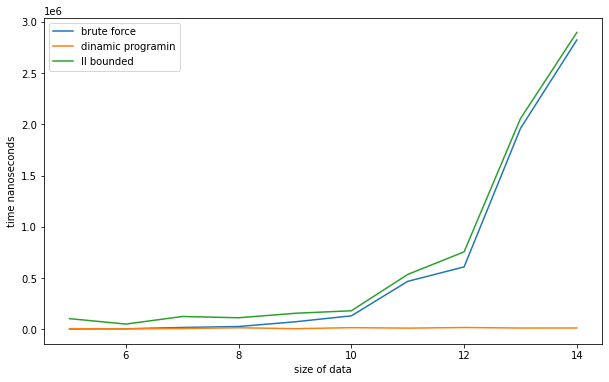

In [94]:

plt.plot(rng, bf, label = "brute force")
plt.plot(rng, dp, label = "dinamic programin")
plt.plot(rng, lc, label = "ll bounded ")
plt.xlabel('size of data')
plt.ylabel('time nanoseconds')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

